<a href="https://colab.research.google.com/github/jplavorr/Data-Science/blob/main/Panorama_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*  

---
  
<center><img alt="Colaboratory logo" width="80%" src="https://image.freepik.com/free-vector/covid-coronavirus-real-3d-illustration-concept-describe-about-corona-virus-anatomy-type_17005-733.jpg"></center>

O ano de 2020 foi marcado por uma doença que se alastrou pelo planeta, a pandemia do novo Coronavírus. Mas o que seria esse novo vírus?

O coronavírus são uma grande família de vírus que causam várias doenças respiratórias, desde doenças ligeiras como a constipação até doenças mais graves como a síndrome respiratória aguda grave (SARS). 

COVID-19 é uma doença infeciosa causada pelo coronavírus da síndrome respiratória aguda grave 2 (SARS-CoV-2). O SARS-CoV-2 foi identificado pela primeira vez por autoridades da cidade de Wuhan, capital da província de Hubei na China, entre pacientes que tinham desenvolvido pneumonia sem causa identificável. No início de janeiro de 2020, a principal fonte de infeção era já a transmissão entre seres humanos.

O surto inicial deu origem a uma pandemia global que ocorre até o dia de hoje (9 de março de 2021) e tem resultado em 117.164.167 casos confirmados e 2.600.504 mortes em todo o mundo.

O que mais assusta sobre essa doença é o seu crescimento **exponencial** no número de infectados e isso é algo muito grave e que muitas não entendem. Por isso, os governos tem que tomar medidas para tentar desacelerar a propagação da doença. Nesse artigo, iremos fazer Análise nos dados relacionados ao COVID-19 com o objetivo de elevar a consciência situacional a respeito da seriedade dessa doença e tentar entender como alguns países lidaram com essa pandemia.


##Obtenção dos Dados

O conjunto completo de dados sobre COVID-19 é uma coleção dos dados sobre COVID-19 mantidos por [Our World in Data](https://ourworldindata.org/coronavirus). Ele é atualizado diariamente e inclui dados sobre casos confirmados, óbitos, hospitalizações, testes e vacinações, bem como outras variáveis ​​de potencial interesse.

### Dicionário de Variáveis
* Na medida que iremos plotar as informações, serão dadas explicações sobre o significado de cada variável, pois não chegaremos a análisar todo DataSet.




###Importando os dados do COVID-19

Nesse repositório do [GitHub](https://github.com/owid/covid-19-data/tree/master/public/data) se encontram os dados coletados pelo *Our World in Data* e iremos exportar os dados como um arquivo `csv` usando a função `pd.read_csv()`. 

In [ ]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style()
%matplotlib inline

In [ ]:
#Criando um DataFrame
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

Antes de começarmos a explorar nosso dataset, é preciso saber com o que estamos lidando. Para começarmos a entender melhor esse aspecto, vamos verificar as dimensões do dataset.

In [ ]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis: ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

#Visualizando as 5 primeiras entradas
df.head()

Dimensões do Dataset 
Variáveis:  59 
Entradas:  73794


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
# extrair os nomes das colunas
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

Outro detalhe importante que precisamos verificar e garantir que estão da forma que precisamos, é o tipo das variáveis. Para isso, utilizaremos o método `dtypes`.



In [ ]:
df.dtypes

iso_code                                  object
continent                                 object
location                                  object
date                                      object
total_cases                              float64
new_cases                                float64
new_cases_smoothed                       float64
total_deaths                             float64
new_deaths                               float64
new_deaths_smoothed                      float64
total_cases_per_million                  float64
new_cases_per_million                    float64
new_cases_smoothed_per_million           float64
total_deaths_per_million                 float64
new_deaths_per_million                   float64
new_deaths_smoothed_per_million          float64
reproduction_rate                        float64
icu_patients                             float64
icu_patients_per_million                 float64
hosp_patients                            float64
hosp_patients_per_mi

Como vimos ao analisar o tipo das variáveis, verificamos que a coluna date não está em formato datetime. Para que possamos explorar essa variável ao máximo, vamos transformá-la para o formato datetime. 

Vamos verificar os dados ausentes presentes nesse DataSet

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

weekly_icu_admissions                    0.991259
weekly_icu_admissions_per_million        0.991259
weekly_hosp_admissions                   0.983346
weekly_hosp_admissions_per_million       0.983346
people_fully_vaccinated                  0.971732
people_fully_vaccinated_per_hundred      0.971732
new_vaccinations                         0.959468
people_vaccinated                        0.957449
people_vaccinated_per_hundred            0.957449
total_vaccinations                       0.951920
total_vaccinations_per_hundred           0.951920
new_vaccinations_smoothed                0.927894
new_vaccinations_smoothed_per_million    0.927894
icu_patients                             0.896482
icu_patients_per_million                 0.896482
hosp_patients                            0.875532
hosp_patients_per_million                0.875532
total_tests                              0.547226
total_tests_per_thousand                 0.547226
new_tests                                0.544191


Em relação aos dados ausentes:
  * A coleta desses dados é feita de forma diária, logo, algumas colunas irão apresentar dados ausentes. Mas isso é dado pela forma de como a coleta é feita.

Em relação ao tipo das variáveis:
  * Note que a variável `date` não está no formato datetime, teremos que corrigir isso para poder usar essa variável de forma correta em nossa análise. 

In [ ]:
# transformando a coluna data em datetime
df.date = pd.to_datetime(df.date)

Com o formato alterado, vamos verificar os seguintes fatores:

  * Qual a data mais recente no nosso DataSet
  * Qual a data que se começou a coleta
  


In [ ]:
#Data mais recente no DataSet
print('Data mais recente:{}'.format(df.date.max()))
#Inicio da coleta
print('\nData de Inicio:{}'.format(df.date.min()))

Data mais recente:2021-03-09 00:00:00

Data de Inicio:2020-01-01 00:00:00


Acima, verificamos que nosso dataset inclui datas desde **01-01-2020** até **09-03-2021**.

#Panorama Geral
Os primeiros casos suspeitos foram notificados em 31 de dezembro de 2019, com os primeiros sintomas aparecendo algumas semanas antes.
Com o desenvolvimento de um teste de PCR de diagnóstico específico para detectar a infecção, a presença de COVID-19 foi então confirmada em 41 pessoas em Wuhan. 

Levando aos seguintes eventos:

 * Em 30 de janeiro, o **CDC**(*Centro de Controle e Prevenção de Doenças*) confirmou o primeiro caso nos Estados Unidos de transmissão de pessoa para pessoa.


 * Em 30 de janeiro, a contagem total de casos do novo coronavírus ultrapassou a de SARS (que afetou 8.096 pessoas em todo o mundo).


 * Em 31 de janeiro, os Estados Unidos
declarou o Coronavirus uma Emergência de Saúde Pública  

* Em 11 de março de 2020, a Organização Mundial da Saúde declarou o surto uma pandemia.

Partindo desses pontos históricos, vamos analisar de como foi a evolução do número de casos do novo Coronavírus durante o ano de 2020 e comparar o número total de casos com as notícias pontuadas acima.

###Histórico de Casos por COVID-19

In [ ]:
#Selecionando dados mundiais
df_mundo = df.loc[df.location =="World"].reset_index(drop=True)

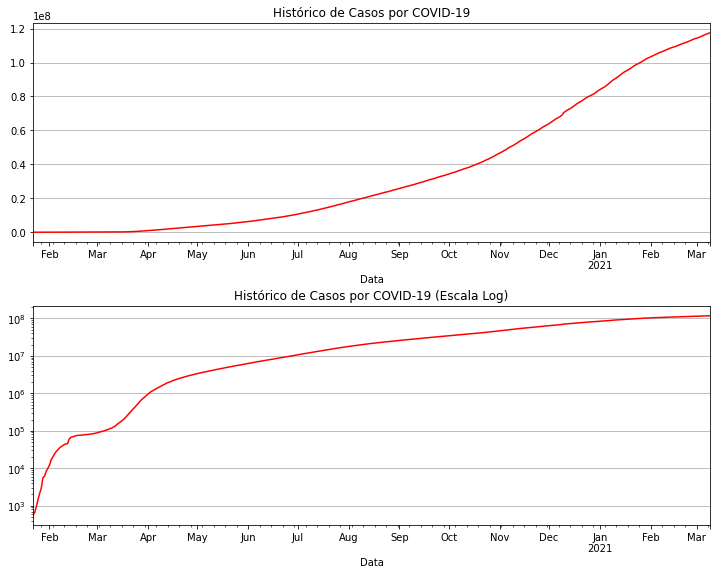

In [ ]:
figure, axes = plt.subplots(nrows = 2, ncols=1)
df_mundo.groupby(['date'])['total_cases'].sum().plot(figsize=(10,8),ax=axes[0], color='red')
df_mundo.groupby(['date'])['total_cases'].sum().plot(figsize=(10,8),ax=axes[1],color='red')
plt.tight_layout(pad=1)
axes[1].set_yscale("log")
axes[1].set_xlabel("Data")
axes[0].set_xlabel("Data")
axes[0].set_title("Histórico de Casos por COVID-19")
axes[1].set_title("Histórico de Casos por COVID-19 (Escala Log)")
axes[0].grid(b=None, which='major', axis='y',linestyle='-')
axes[1].grid(b=None, which='major', axis='y',linestyle='-')
plt.show()

In [ ]:
#Selecionando apenas os dias na coluna de datas
df_mundo['days'] = df['date'].apply(lambda x: x.weekday()) 

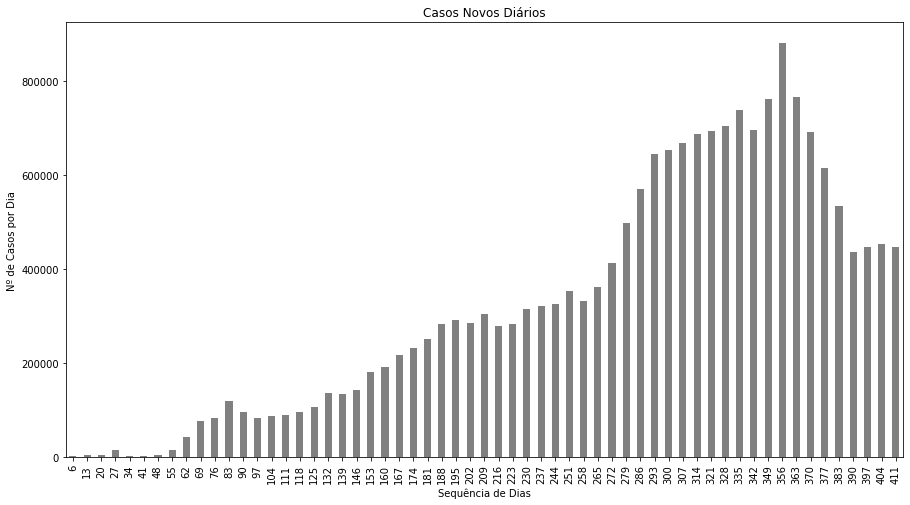

In [ ]:
#Casos diários
df_mundo.groupby(['days'])['new_cases'].plot(kind='bar',figsize=(15,8), color = 'grey')
plt.title('Casos Novos Diários')
plt.xlabel('Sequência de Dias')
plt.ylabel('Nº de Casos por Dia')
plt.show();

###Histórico de Mortes por COVID-19

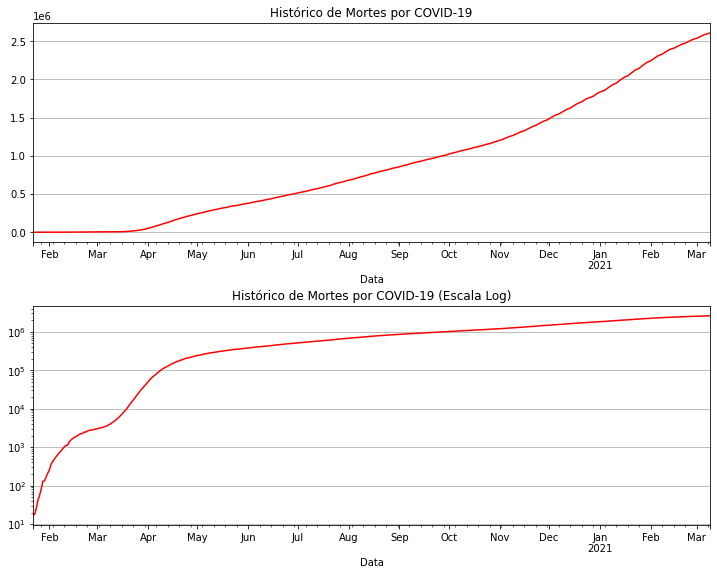

In [ ]:
figure, axes = plt.subplots(nrows = 2, ncols=1)
df_mundo.groupby(['date'])["total_deaths"].sum().plot(figsize=(10,8),ax=axes[0], color='red')
df_mundo.groupby(['date'])["total_deaths"].sum().plot(figsize=(10,8),ax=axes[1],color='red')
plt.tight_layout(pad=1)
axes[1].set_yscale("log")
axes[1].set_xlabel("Data")
axes[0].set_xlabel("Data")
axes[0].set_title("Histórico de Mortes por COVID-19")
axes[1].set_title("Histórico de Mortes por COVID-19 (Escala Log)")
axes[0].grid(b=None, which='major', axis='y',linestyle='-')
axes[1].grid(b=None, which='major', axis='y',linestyle='-')
plt.show()

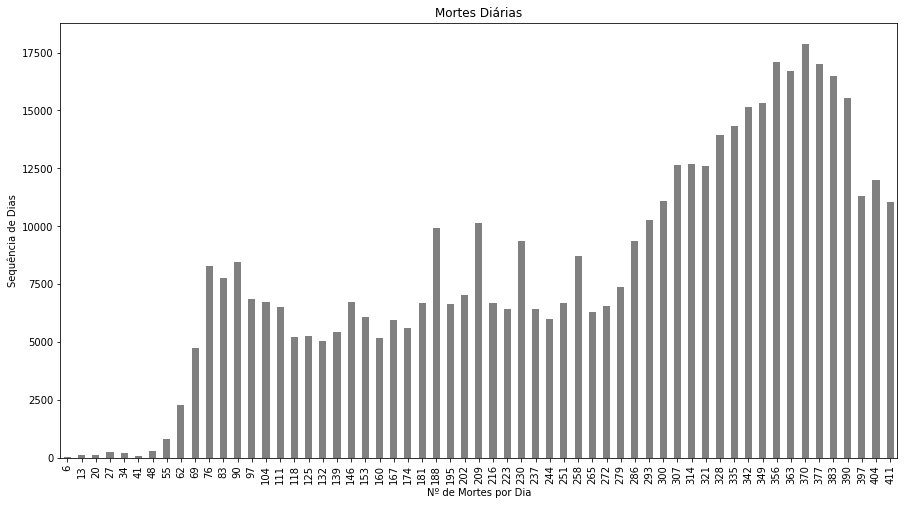

In [ ]:
df_mundo.groupby(['days'])['new_deaths'].plot(kind='bar',figsize=(15,8), color = 'grey')
plt.title('Mortes Diárias')
plt.xlabel('Nº de Mortes por Dia')
plt.ylabel('Sequência de Dias')
plt.show();

Utilizando a escala logaritmica, podemos ter uma noção melhor da evolução alarmante do número de casos. 

* Em fevereiro de 2020, já tinhamos ultrapassado a marca de 10 mil e nos aproximando de 1000 mortes pelo novo Coronavírus (que mostra que COVID-19 superou o número de casos de SARS). 

* Em Março de 2020 ultrapassamos a marca de 100 mil casos e aproximadamente 5 mil mortes por coronavírus no mundo. 

* O pico de contaminação ocorreu por volta 800 mil novos casos em um dia. 

* O pico de mortes foi por volta de 17.5 mil mortes em um dia



##Taxa de Letalidade

Na mídia, muitas vezes é a “taxa de letalidade” que é comentada quando o risco de morte por COVID-19 é discutido. Mas temos que entender isso não é o mesmo que o risco de morte para uma pessoa infectada, embora, infelizmente, vemos muitas vezes notícias sugerindo que sim. É relevante e importante, mas está longe de ser toda a história. 

A *Taxa de Letalidade* é muito fácil de calcular. Você pega o número de pessoas que morreram e divide pelo número total de pessoas diagnosticadas com a doença. Portanto, se 10 pessoas morreram e 100 pessoas foram diagnosticadas com a doença, a taxa de letalidade é de 0.1 ou 10%.





In [ ]:
#Taxa de Letalidade
df_mundo.loc[df_mundo.date == '2021-03-09']['total_deaths'] / df_mundo.loc[df_mundo.date == '2021-03-09']['total_cases']

412    0.022203
dtype: float64

Podemos ver, que até a data atual, corona vírus tem uma taxa de letalidade de 2.23%. Isso significa, que a cada 100 pessoas infectadas, 2 morrem. Mas essa taxa varia por localidade, alguns países tem taxas de letalidades maiores que outros (Iremos analisar isso posteriormente).

Mas é importante notar que isso se trata da razão entre o número de mortes confirmadas pela doença e o número de casos confirmados. E não o número total de casos, pois existem pessoas com a doença que não foram diagnosticadas. Portanto o número total de casos é maior, isso significa, que a taxa de letalidade está superestimada. Se acredita que existem muitas pessoas que não são diagnosticadas, pois não existem teste para todos.


**Taxa Bruta de Letalidade**  mede a probabilidade de que qualquer indivíduo na população morra da doença, não apenas aqueles que estão infectados ou confirmados como infectados. É calculado dividindo o número de mortes pela doença pela população total. Por exemplo, se houvesse 10 mortes em uma população de 1.000, a taxa bruta de letalidade seria [10 / 1.000], ou 1%, mesmo se apenas 100 pessoas tivessem sido diagnosticadas com a doença.


In [ ]:
#Taxa Bruta de Letalidade
df_mundo.loc[df_mundo.date == '2021-03-09']['total_deaths'] / df_mundo.loc[df_mundo.date == '2021-03-09']['population']

412    0.000335
dtype: float64

A *Taxa Bruta de Letalidade* é de 0.033%. 


### O que torna COVID-19 tão preocupante?
COVID-19 é transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia de pessoa para pessoa.

Pudemos ver anteriormente que a taxa de letalidade da COVID-19 não é tão alta. Mas em contrapartida, possui grau elevado de infecção, caracterizado por um crescimento exponêncial de novos infectados. Mas o que seria 'Crescimento Exponencial' e como isso pode ser preocupante?

####Propagação Exponencial
A taxa de transmissibilidade (a rapidez com que a doença se espalha) de um vírus é indicada por seu número reprodutivo (**R0**), que representa o número médio de pessoas para as quais uma única pessoa infectada transmitirá o vírus. 
Estudos preliminares feitos por epidemologistas estimaram que o **R0** estava entre 1,5 e 3,5.




Isso significa que a cada pessoa infectada por COVID-19, poderá infectar em média até 4 pessoas, caso não seja tomado os devidos cuidados. Talvez o **R0** não lhe assuste, mas se colocarmos por exemplo em março, com 100 mil infectados. Sem o devido cuidado, essas pessoas poderão infectar em média, até 400 mil pessoas. Para entender melhor sobre o assunto: 

* [3blue1brown](https://www.youtube.com/watch?v=Kas0tIxDvrg&ab_channel=3Blue1Brown) - Crescimento exponencial e epidemias. 

* [Corridor Crew](https://www.youtube.com/watch?v=e02eiX866N4&ab_channel=CorridorCrew) - Usando Efeitos Especiais Para Explicar Por Que O COVID-19 Surpreendeu Todo Mundo.

* [Matemática.Universitária](https://www.youtube.com/watch?v=SkkusdeBtnU&ab_channel=Matem%C3%A1tica.Universit%C3%A1ria) - O número reprodutivo básico R0

Pelo fato de termos um número limitado de leitos em hospitáis, se torna algo muito procupante. Portanto se o número de casos se alastre, não será ser possível dar assistência medica a todos os infectados.

**Assumindo R0 = 2**

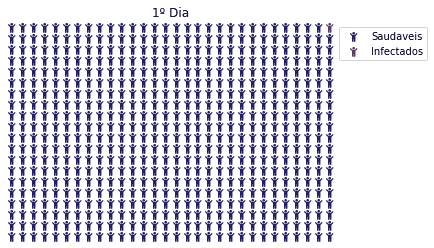


Para termos uma ideia visual, o gráfico mostra que com uma população de 500 pessoas e um infectado, levam 9 dias para ter mais da metade da população infectada com a doença (Isso, assumindo um R0 menor do que o do COVID-19)

*O gif acima foi feito usando o pacote Waffle e o programa ImageJ.*

## Lidando com a Pandemia

<center><img alt="Colaboratory logo" width="70%" src="https://image.freepik.com/free-vector/covid-coronavirus-real-3d-illustration-concept-describe-about-lockdown-area_17005-731.jpg"></center>


A magnitude dos impactos do COVID-19 tem variado muito entre os países, alguns têm sido muito bem sucedidos em limitar a propagação da doença e prevenir mortes. 

Existem muitos motivos pelos quais alguns países podem ter sido mais atingidos do que outros. As diferenças nas respostas das políticas governamentais podem explicar algumas das diferenças.

Nessa seção, vamos entender como alguns países sofreram com o surto de casos durante a pandemia e a partir desses dados, tentar entender se foi feito alguma contra medida eficaz para frear o número massivo de casos. Iremos fazer isso análisando o total de casos e mortes até a data mais recente. 





###Total de Casos por Países

In [ ]:
# total de casos
df.loc[df.date == '2021-03-09', ['location',"total_cases", 'total_cases_per_million','population']].sort_values(by="total_cases", ascending=False)[3:15]

,location,total_cases,total_cases_per_million,population
70350,United States,29096048.0,87902.765,3.310026e+08
3862,Asia,25728012.0,5545.013,4.639847e+09
23294,European Union,23398418.0,52590.280,4.449191e+08
61573,South America,18760289.0,43551.627,4.307598e+08
30727,India,11262707.0,8161.356,1.380004e+09
9859,Brazil,11122429.0,52326.213,2.125594e+08
55010,Russia,4293750.0,29422.454,1.459345e+08
69937,United Kingdom,4241858.0,62485.015,6.788600e+07
24571,France,3992755.0,61169.606,6.527351e+07
770,Africa,3981161.0,2969.690,1.340598e+09


Pudemos verificar que os países líderes em casos aos 08 de Março de 2021 eram:

* Estados Unidos - 29.038.631 casos
* India - 11.244.786 casos
* Brasil - 11.051.665 casos
* Russia - 4.284.408 casos
* Reino Unido - 4.235.989 casos
* França - 3.969.612 casos
* Espanha - 3.160.970 casos
* Italia - 3.081.368 casos

Agora, vamos verificar os casos de morte.

In [ ]:
# total de mortes
df.loc[df.date == '2021-03-09',['location',"total_deaths", 'total_deaths_per_million','population']].sort_values(by="total_deaths", ascending=False)[4:15]

,location,total_deaths,total_deaths_per_million,population
70350,United States,527699.0,1594.244,3.310026e+08
61573,South America,485374.0,1126.786,4.307598e+08
3862,Asia,406070.0,87.518,4.639847e+09
9859,Brazil,268370.0,1262.565,2.125594e+08
43280,Mexico,191789.0,1487.512,1.289328e+08
30727,India,158063.0,114.538,1.380004e+09
69937,United Kingdom,125032.0,1841.793,6.788600e+07
770,Africa,106381.0,79.353,1.340598e+09
33473,Italy,100479.0,1661.858,6.046183e+07
24571,France,89455.0,1370.464,6.527351e+07


Em relação às mortes, os países que lideravam aos 08 de Março de 2021 eram:

* Estados Unidos - 525.752 Mortes
* Brasil - 266.398 Mortes
* Mexico - 190.923 Mortes
* India - 157.930 Mortes
* Reino Unido - 124.801 Mortes
* Italia - 100.103 Mortes
* França - 89.090 Mortes
* Russia - 87.9855 Mortes





Acima temos os países com os piores dados em relação a COVID. 
Vamos plotar um gráfico comparando esses países, para ter ideia se houve uma tentativa de frerar a propagação da doença. 

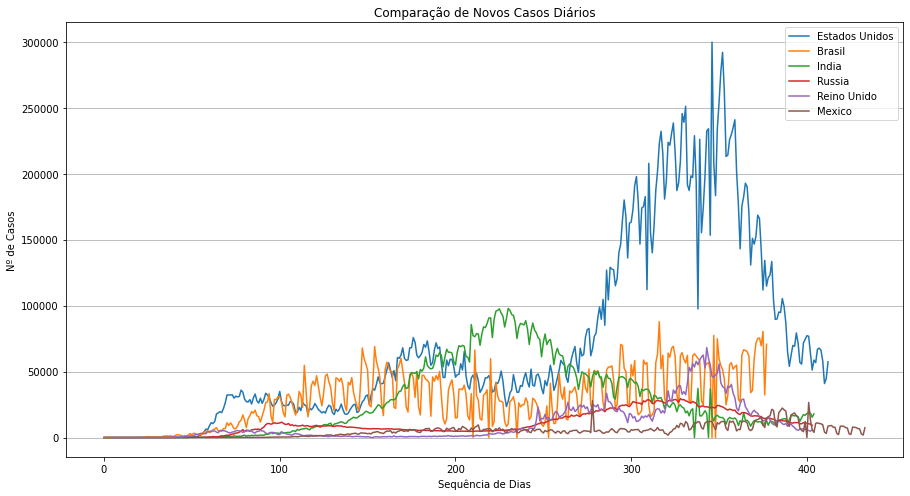

In [ ]:
#Gráfico de comparação entre os países
labels = ['Estados Unidos','Brasil','India','Russia','Reino Unido','Mexico']
df.loc[df.location == 'United States', 'new_cases'].reset_index(drop=True).plot(figsize=(15,8))
df.loc[df.location == 'Brazil', 'new_cases'].reset_index(drop=True).plot(figsize=(15,8))
df.loc[df.location == 'India', 'new_cases'].reset_index(drop=True).plot(figsize=(15,8))
df.loc[df.location == 'Russia', 'new_cases'].reset_index(drop=True).plot(figsize=(15,8))
df.loc[df.location == 'United Kingdom', 'new_cases'].reset_index(drop=True).plot(figsize=(15,8))
df.loc[df.location == 'Mexico', 'new_cases'].reset_index(drop=True).plot(figsize=(15,8))
plt.legend(labels)
plt.title('Comparação de Novos Casos Diários')
plt.ylabel('Nº de Casos')
plt.xlabel('Sequência de Dias')
plt.grid(b=None, which='major', axis='y',linestyle='-')
plt.show()

Nessa comparação, já podemos notar algumas peculiaridades:

* Estados Unidos doutrina a evolução dos casos.
* México é um dos 5 maiores países em relação a mortes por COVID-19, mas não aparenta ter um número grande de casos diários.

Mas isso significa que os Estados Unidos esta lidando mal com a pandemia, ou que o México tem um número altos de mortes por um sistema de saúde precario? 

Não Necessariamente, pode ser pelo simples fato de que os Estados Unidos fazem mais testes em sua população, enquanto muitas pessoa no México morrem por COVID-19 mas não tiveram um diagnóstico prévio. Em seguida, iremos olhar como estão os números de testes entre esses países acima.

#Testes COVID-19


<center><img alt="Colaboratory logo" width="60%" src="https://image.freepik.com/free-vector/coronavirus-test-kit-background_52683-38351.jpg"></center>

Vamos comparar agora como foram feitos os testes em COVID-19 entre esses países, para saber se eles representam bem seus números de casos. 

DataSet que usamos inicialmente para esse projeto não constam os dados de testes de COVID-19. Entretanto, no mesmo repositório do GitHub, do [Our World in Data](https://github.com/owid/covid-19-data/blob/master/public/data/testing/covid-testing-all-observations.csv) conseguimos encontrar um arquivo csv focado nesses dados.


In [ ]:
#Importando Repositorio
df_testes = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/testing/covid-testing-all-observations.csv', error_bad_lines = False)

In [ ]:
df_testes.head()

,Entity,ISO code,Date,Source URL,Source label,Notes,Daily change in cumulative total,Cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,7-day smoothed daily change,7-day smoothed daily change per thousand,Short-term positive rate,Short-term tests per case
0,Albania - tests performed,ALB,2020-02-25,https://shendetesia.gov.al/koronavirusi-mshms-...,Ministry of Health and Social Protection,NaN,8.0,8.0,0.003,0.003,NaN,NaN,NaN,NaN
1,Albania - tests performed,ALB,2020-02-26,https://shendetesia.gov.al/fond-shtese-per-mas...,Ministry of Health and Social Protection,NaN,5.0,13.0,0.005,0.002,NaN,NaN,NaN,NaN
2,Albania - tests performed,ALB,2020-02-27,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,4.0,17.0,0.006,0.001,NaN,NaN,NaN,NaN
3,Albania - tests performed,ALB,2020-02-28,http://shendetesia.gov.al/manastirliu-asnje-ra...,Ministry of Health and Social Protection,NaN,1.0,18.0,0.006,0.000,NaN,NaN,NaN,NaN
4,Albania - tests performed,ALB,2020-02-29,https://shendetesia.gov.al/ministria-e-shendet...,Ministry of Health and Social Protection,NaN,8.0,26.0,0.009,0.003,NaN,NaN,NaN,NaN


Vamos passar a coluna de Datas para formato `to_datetime`.

In [ ]:
#Data mais recente no DataSet
print('Data mais recente:{}'.format(df_testes.Date.max()))



Data mais recente:2021-03-08


In [ ]:
# transformando a coluna data em datetime
df_testes.Date = pd.to_datetime(df_testes.Date)

A data mais recente presente no DataSet é 08 de Março de 2021, mas isso não significa que todos os países estão datados corretamente dentro desse arquivo. Por isso, vamos selecionar os países em questão e olhar para ver quando foi a ultima atualização dele no DataSet.

Para isso, vamos selecionar a coluna com os códigos para os nomes dos países (`ISO codes`) que queremos analisar.

In [ ]:
#Selecionando os ISO codes
df_paises = df_testes[df_testes['ISO code'].isin(['USA','BRA','MEX','RUS','IND','GBR'])]

In [ ]:
#Checando a ultima atualização
print('Ultima atualização do Brasil foi: {}'.format(df_testes[df_testes['ISO code'].isin(['BRA'])].Date.max()))
print('\nUltima atualização dos Estados Unidos foi: {}'.format(df_testes[df_testes['ISO code'].isin(['USA'])].Date.max()))
print('\nUltima atualização do México foi: {}'.format(df_testes[df_testes['ISO code'].isin(['MEX'])].Date.max()))
print('\nUltima atualização da Russia foi: {}'.format(df_testes[df_testes['ISO code'].isin(['RUS'])].Date.max()))
print('\nUltima atualização da India foi: {}'.format(df_testes[df_testes['ISO code'].isin(['IND'])].Date.max()))
print('\nUltima atualização do Reino Unido foi: {}'.format(df_testes[df_testes['ISO code'].isin(['GBR'])].Date.max()))

Ultima atualização do Brasil foi: 2020-09-19 00:00:00

Ultima atualização dos Estados Unidos foi: 2021-03-04 00:00:00

Ultima atualização do México foi: 2021-03-06 00:00:00

Ultima atualização da Russia foi: 2021-03-07 00:00:00

Ultima atualização da India foi: 2021-03-07 00:00:00

Ultima atualização do Reino Unido foi: 2021-03-04 00:00:00


O Brasil é o único país que apresenta dados ultrapassados, sendo sua ultima atualização em setembro de 2020. Para termos uma análise parcial, iremos comparar o número de vacinação dos países, referente a data de atualização mais recente do Brasil.

In [ ]:
df_paises.loc[df_paises.Date == '2020-09-19', ['ISO code', 'Cumulative total']].sort_values(by="Cumulative total", ascending=False)

,ISO code,Cumulative total
39712,USA,107235270.0
14865,IND,62454254.0
31039,RUS,42821891.0
39343,GBR,19739363.0
4981,BRA,6421441.0
23163,MEX,1610198.0


Vamos fazer uso de um gráfico de barras, para ter uma noção visual dessa comparação.

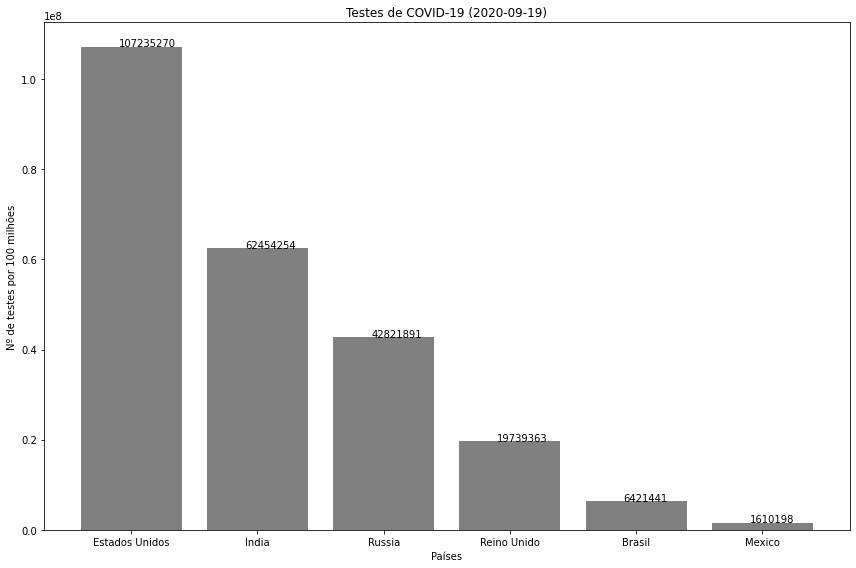

In [ ]:
# gráfico de barras para total de mortes
top_6_total_tests = df_paises.loc[df_paises.Date == '2020-09-19', ['ISO code', 'Cumulative total']].sort_values(by="Cumulative total", ascending=False)

fig, ax = plt.subplots(figsize=(12,8))

# Valor inteiro do Número de Vacinas por país
totalTests = [107235270, 62454254, 42821891, 19739363, 6421441, 1610198]
for i in range(6):
    plt.annotate(totalTests[i], (-0.1 + i, totalTests[i]))

ax.bar('ISO code', 'Cumulative total', data=top_6_total_tests, color ='grey')
my_xticks = ['Estados Unidos','India','Russia','Reino Unido','Brasil','Mexico']
plt.xticks(np.arange(6), my_xticks);

#Titulo
plt.title('Testes de COVID-19 (2020-09-19)')
plt.ylabel('Nº de testes por 100 milhões')

#Nomes dos Eixos
plt.xlabel('Países')
plt.tight_layout()

#Plotando
plt.show()


Com isso, podemos concluir justamente as hipóteses que tinhamos anteriormente.

* Estados Unidos é o país líder em testes, portanto, ele vai apresentar mais casos.

* Já o México, é o último em testes, portanto, muitas pessoas tem a doença e não foram testadas. Por conta disso, México apresenta um número muito preocupante de mortes, mas um número "suavizado" em relação aos seus casos.

* Já o Brasil apresenta um descaso muito grande em relação a divulgação de seus dados, com sua última atualização, sendo a quase 6 meses atrás. 

# Panorama do COVID-19 no Brasil

<center><img alt="Colaboratory logo" width="70%" src="https://www.oficinadanet.com.br/imagens/post/30286/corona-oficina-capa-brasil.jpg"></center>

Vimos anteriormente que o Brasil está entre os países com mais casos de COVID-19 no mundo, mesmo com poucos testes sendo feitos na população. Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise específica sobre os dados públicos da doença no Brasil.

In [ ]:
# Criar uma cópia do DataFrame apenas com o Brasil
df_brasil = df.loc[df.location == "Brazil"].copy()

df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
9482,BRA,South America,Brazil,2020-02-26,1.0,1.0,NaN,NaN,NaN,NaN,0.005,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9483,BRA,South America,Brazil,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9484,BRA,South America,Brazil,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.005,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9485,BRA,South America,Brazil,2020-02-29,2.0,1.0,NaN,NaN,NaN,NaN,0.009,0.005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765
9486,BRA,South America,Brazil,2020-03-01,2.0,0.0,NaN,NaN,NaN,NaN,0.009,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.56,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2,75.88,0.765


In [ ]:
#Data mais recente no DataSet
print('Data mais recente:{}'.format(df_brasil.date.max()))
#Inicio da coleta
print('\nData de Inicio:{}'.format(df_brasil.date.min()))

Data mais recente:2021-03-09 00:00:00

Data de Inicio:2020-02-26 00:00:00


###Evolução dos casos/Morte por COVID-19 no Brasil

Vamo tentar entender o início dos casos/mortes pela COVID-19 no Brasil e como foi a evolução dela até os dias atuais.

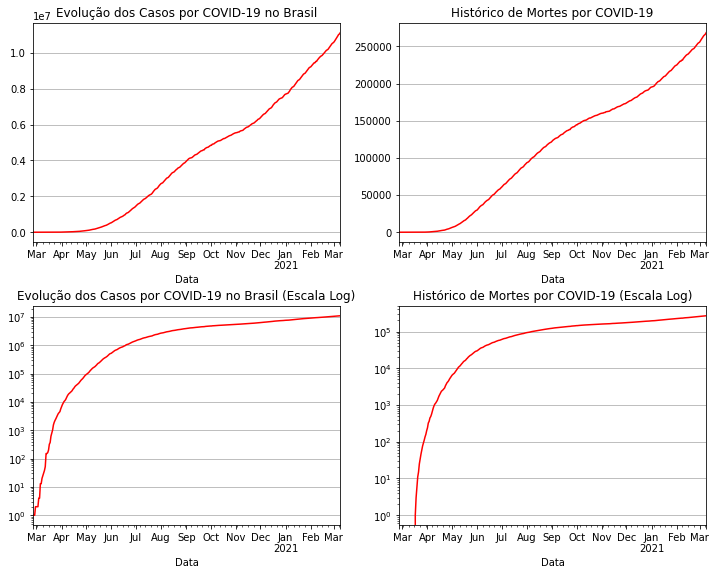

In [ ]:
figure, axes = plt.subplots(nrows = 2, ncols=2)
df_brasil.groupby(['date'])['total_cases'].sum().plot(figsize=(10,8),ax=axes[0,0], color='red')
df_brasil.groupby(['date'])['total_cases'].sum().plot(figsize=(10,8),ax=axes[1,0],color='red')
df_brasil.groupby(['date'])["total_deaths"].sum().plot(figsize=(10,8),ax=axes[0,1], color='red')
df_brasil.groupby(['date'])["total_deaths"].sum().plot(figsize=(10,8),ax=axes[1,1],color='red')
plt.tight_layout(pad=1)
axes[1,0].set_yscale("log")
axes[1,1].set_yscale("log")
axes[1,0].set_xlabel("Data")
axes[0,0].set_xlabel("Data")
axes[0,1].set_xlabel("Data")
axes[1,1].set_xlabel("Data")
axes[0,0].set_title("Evolução dos Casos por COVID-19 no Brasil")
axes[1,0].set_title("Evolução dos Casos por COVID-19 no Brasil (Escala Log)")
axes[0,1].set_title("Histórico de Mortes por COVID-19")
axes[1,1].set_title("Histórico de Mortes por COVID-19 (Escala Log)")
axes[0,0].grid(b=None, which='major', axis='y',linestyle='-')
axes[1,0].grid(b=None, which='major', axis='y',linestyle='-')
axes[0,1].grid(b=None, which='major', axis='y',linestyle='-')
axes[1,1].grid(b=None, which='major', axis='y',linestyle='-')
plt.show()

In [ ]:
#Data de testes no brasil
df_brasil_testes = df_testes[df_testes['ISO code'].isin(['BRA'])]

In [ ]:
df_brasil_testes.loc[df_brasil_testes['Daily change in cumulative total'] != 0.0].head(1) 
print('O primeiro teste foi registrada em {}'.format(df_brasil_testes.Date.loc[4885]))

O primeiro teste foi registrada em 2020-04-07 00:00:00


In [ ]:
df_testes.loc[df_testes['Daily change in cumulative total'] != 0.0].head(1)

,Entity,ISO code,Date,Source URL,Source label,Notes,Daily change in cumulative total,Cumulative total,Cumulative total per thousand,Daily change in cumulative total per thousand,7-day smoothed daily change,7-day smoothed daily change per thousand,Short-term positive rate,Short-term tests per case
0,Albania - tests performed,ALB,2020-02-25,https://shendetesia.gov.al/koronavirusi-mshms-...,Ministry of Health and Social Protection,NaN,8.0,8.0,0.003,0.003,NaN,NaN,NaN,NaN


Vamos procurar identificar quandos dias demorou para a ocorrência do primeiro teste, em relação ao primeiro teste feito no mundo.

In [ ]:
# calculando quanto tempo o Brasil começou a testar em relação ao primeiro país
dif_test = df_brasil_testes.Date.min() - df_testes.Date.min()
print('O Brasil começou a testar a população {} dias após o primeiro do mundo'.format(dif_test.days))

O Brasil começou a testar a população 97 dias após o primeiro do mundo


Podemos ver um atraso quase 100 dias, isso pode ser devido a um descaso governamental, como apenas uma má informação nos dados ou como um atraso em efetuar testes na população. Vimos que o Brasil parou de notificar o número de testes aplicados na população por volta de 6 meses. Independente se os dados não estão em datas corretas, existe um descaso ao declarar os dados envolvendo a pandemia no país. 


####Taxa de Letalidade
Anteriormente vimos que, a taxa de letalidade é uma estimativa (no caso da COVID-19) para o risco de morte por COVID-19. Vamos calcular essa taxa para os casos no Brasil.

In [ ]:
#taxa de letalidade brasil
df_brasil.loc[df_brasil.date == '2021-03-09']['total_deaths'] / df_brasil.loc[df_brasil.date == '2021-03-09']['total_cases']


9859    0.024129
dtype: float64

A taxa de letalidade brasileira é de 2.41%, sendo maior do que a taxa mundial. Mas como vimos anteriormente, o Brasil não aplica tanto testes na população, e portanto, esssa taxa provávelmente está superestimada.

Agora, vamos calcular qual a porcentagem de mortes por COVID-19 no Brasil em relação ao número total de mortos no mundo.

In [ ]:
#porcentagem de mortes no brasil em relação ao mundo
print(df_mundo.loc[df_mundo.date == '2021-03-09']['total_deaths'])
print(df_brasil.loc[df_brasil.date == '2021-03-09']['total_deaths'])
print("\nPorcentagem de mortes por COVID-19: {}".format(268370/ 2610184))

412    2610184.0
Name: total_deaths, dtype: float64
9859    268370.0
Name: total_deaths, dtype: float64

Porcentagem de mortes por COVID-19: 0.10281650642253573


Novamente nos deparamos com uma notícia preocupante. 10% das mortes causadas por COVID-19 são do Brasil, isso é um número muito alarmante, pois o Brasil não representa uma parcela dominante da população mundial. 

Vamos olhar como foram os casos diários no Brasil, para entender como os casos se comportaram e aparentam progredir.

###Onda de Casos

Não há uma definição estrita para o que é uma onda ou fase epidêmica. Uma onda implica um número crescente de indivíduos doentes, um pico definido e, em seguida, um declínio. A palavra “onda” implica um padrão natural de picos e vales. 

Sugere que mesmo durante uma calmaria, futuros surtos de doenças são possíveis.

Vamos plotar os casos diários do Brasil, para ver se estamos num ponto de calmaria ou ainda estamos no pico da nossa onda.


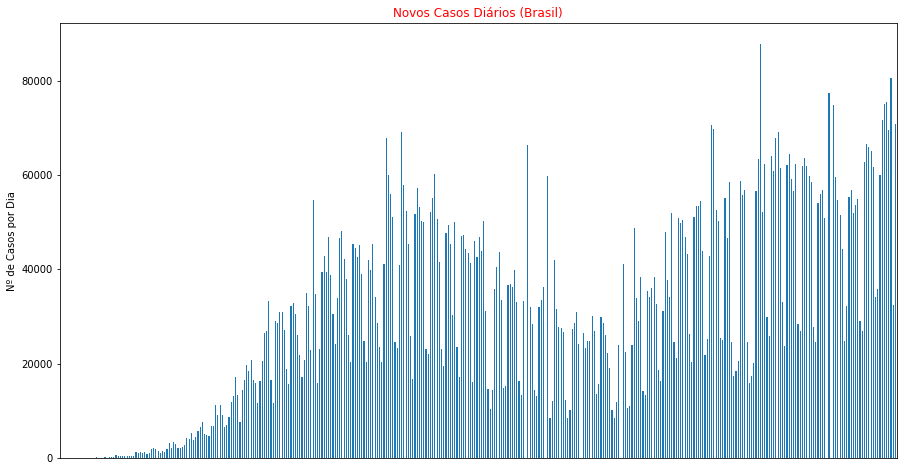

In [ ]:
#Gráfico Diario de casos de COVID no Brasil
figure, axes = plt.subplots()
df.loc[df.location == 'Brazil', 'new_cases'].reset_index(drop=True).plot(kind='bar',ax=axes,figsize=(15,8))
plt.title('Novos Casos Diários (Brasil)', color = "red")
plt.xlabel('Sequência de Dias')
plt.ylabel('Nº de Casos por Dia')
#remover xticks do eixo x
axes.xaxis.set_visible(False)

plt.show();

Nesse gráfico, podemos notar:

* Tivemos mais de 80 mil novos casos confirmados em um único dia.

* Para um aumento de nossa preocupação, esse gráfico não dá indícios de que o número de casos vem diminuindo.  

Podemos ver que em um determinado ponto, o número de casos da uma diminuída. Mas infelizmente, não podemos considerar isso como um vale. Se o aumento (de novos casos) não tiver sido precedido por um vale profundo, infelizmente, o que daria enteder como uma onda, na verdade, são rebotes ou recrudescências da mesma onda. Ou seja, nós ainda não saímos da primeira.

Para ter uma visão melhor de como seria um verdadeiro vale profundo, vamos olhar para outros países e avaliar os seus casos diários para fazer uma comparação.

####Comparação de Ondas

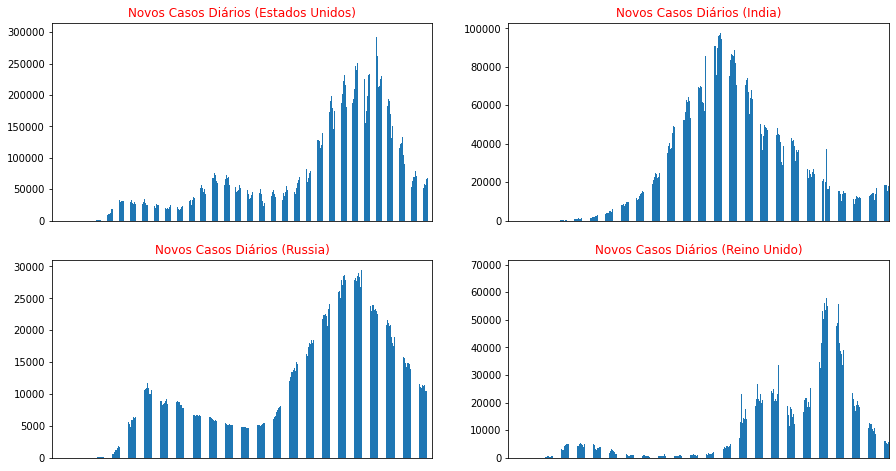

In [ ]:
#Comparando os gráficos de outros países
figure, axes = plt.subplots(nrows=2,ncols=2)
df.loc[df.location == 'United States', 'new_cases'].reset_index(drop=True).plot(kind='bar',ax=axes[0,0],figsize=(15,8))
df.loc[df.location == 'India', 'new_cases'].reset_index(drop=True).plot(kind='bar',ax=axes[0,1],figsize=(15,8))
df.loc[df.location == 'Russia', 'new_cases'].reset_index(drop=True).plot(kind='bar',ax=axes[1,0],figsize=(15,8))
df.loc[df.location == 'United Kingdom', 'new_cases'].reset_index(drop=True).plot(kind='bar',ax=axes[1,1],figsize=(15,8))
#remover xticks do eixo x
axes[0,0].xaxis.set_visible(False)
axes[0,1].xaxis.set_visible(False)
axes[1,0].xaxis.set_visible(False)
axes[1,1].xaxis.set_visible(False)
#Titulo
axes[0,0].set_title('Novos Casos Diários (Estados Unidos)', color = "red")
axes[0,1].set_title('Novos Casos Diários (India)', color = "red")
axes[1,0].set_title('Novos Casos Diários (Russia)', color = "red")
axes[1,1].set_title('Novos Casos Diários (Reino Unido)', color = "red");

Acima podemos ver que em todos os países, os casos aparentam diminuir. Grandes ondas estão seguidas de vales profundos, mostrando uma diminuição nos novos casos

#Conclusão
<center><img alt="Colaboratory logo" width="70%" src="https://image.freepik.com/free-vector/covid-19-coronavirus-outbreak-design-with-falling-virus-blood-cell-microscopic-view-light-background-2019-ncov-corona-virus-illustration-dangerous-sars-epidemic-theme-banner_1314-2658.jpg"></center>

### Mundo

O novo coronavírus abalou o mundo moderno, com seu alto índice de contaminação e infelizmente levando alguns desses pacientes contaminados a óbito.

Recentemente tivemos o momento mais esperado dessa pandemia, a criação da vacina contra COVID-19 que já estão sendo aplicadas em humanos. Esse processo tem que ser feito o mais rápido e seguro possível, para evitar possíveis segundas ondas de casos, ou até mesmo alguma variante do vírus que possa vir a resistir a essa vacina.

### Brasil

Através de uma comparação gráfica, notamos que não aparentou ter tido muito empenho no combate a pandemia do novo coronavírus. Entre os países com mais casos de infectados, o Brasil aparentou ser o único que não conseguiu se livrar da primeira onda, sofrendo inclusive um rebote da onda com um aumento no número de casos. 

Portanto, o Brasil precisa investir em medidas para conter a evolução de novos casos. Enrijecendo as normas de distanciamento, aumentando o incentivo (ou até mesmo tornar obrigatório) do uso de máscara em locais públicos e além disso, começar um investimento em massa na compra de vacinas, para ao menos, vacinar a população presente no grupo de risco do vírus. 

Obrigado por ler. Se cuide!


###Referências

Os dados usados nesse artigo são diariamente atualizados pelo *Our World in Data*, então, ao rodar, você terá datas atualizadas para fazer novas análises. 

Caso queira se aprofundar mais, poderá encontrar informações em: 

* O site [Worldometer](https://www.worldometers.info/coronavirus/) apresenta gráficos e informações atualizadas sobre novos casos de COVID-19. Além de ser uma das princípais fontes usadas por estatísticos em seus trabalhos.

* O site oficial do [Our World in Data](https://ourworldindata.org/coronavirus) foi de onde extraimos os dados para esse artigo, além disso é a fonte de dados usadas por muitas plataformas (entre elas, o google). Também atualizada diariamente, contém seções com diferentes abordagens interessantes que vale a pena dar uma conferida.

